[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ghulom97/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Detected encoding: utf-8
First 10 tokens: ['Goals', '!', 'How', 'to', 'Get', 'Everything', 'You', 'Want', '—', 'Faster']
[('self', 93), ('america', 14), ('non', 13), ('esteem', 12), ('harvard', 11), ('napoleon', 11), ('hill', 11), ('thomas', 9), ('edison', 9), ('cadillac', 9)]


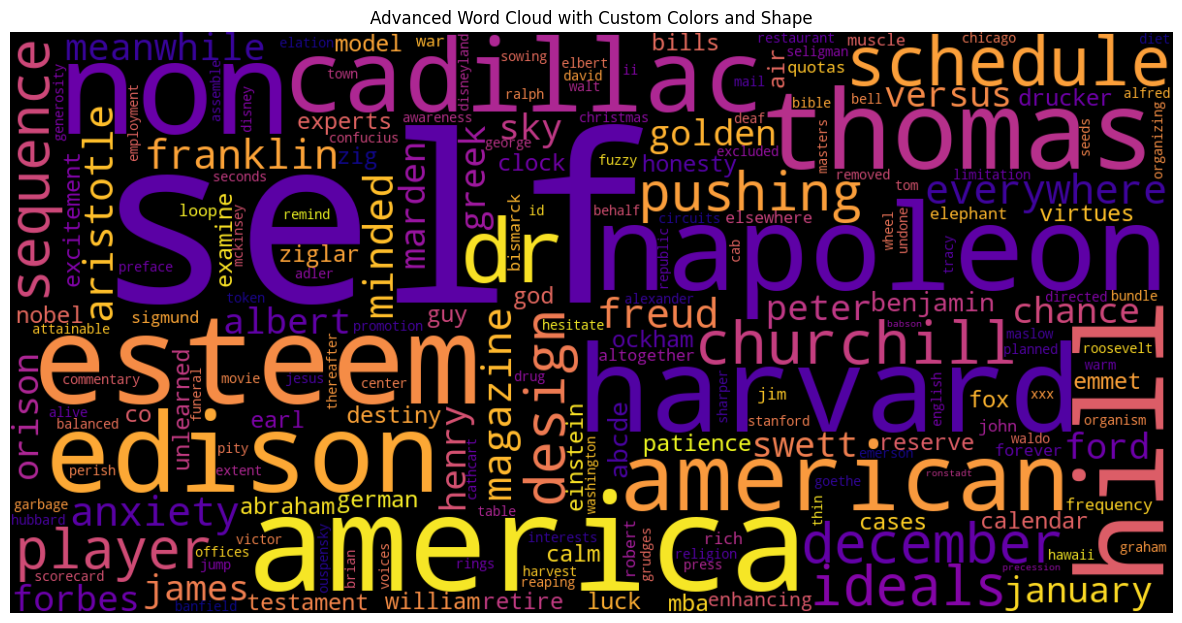

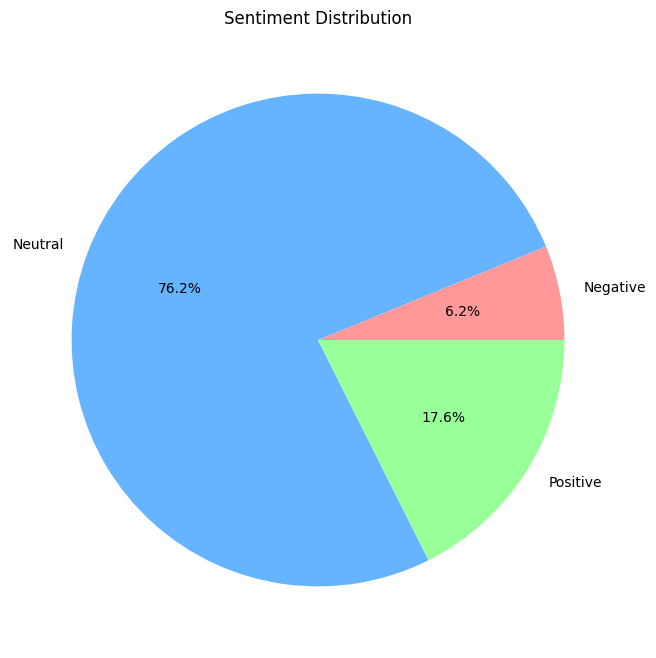

/Users/ghulom97/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/Users/ghulom97/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/Users/ghulom97/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/ghulom97/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



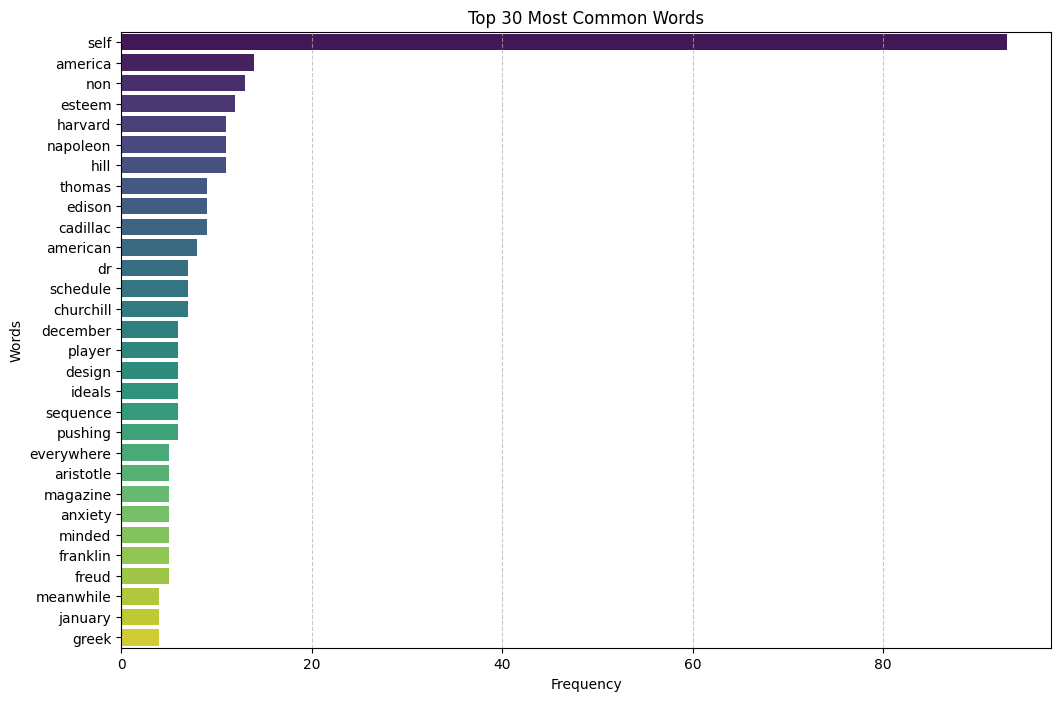

In [16]:
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import chardet

# NLTK 패키지 다운로드 (처음 한 번만 실행)
nltk.download('stopwords')

# 파일 인코딩 자동 감지 및 파일 읽기
file_path = "/Users/ghulom97/PROJECTS/english_text_analysis/Brian-Tracy-Goals.txt"

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Detected encoding: {encoding}")

with open(file_path, encoding=encoding) as file:
    text = file.read()

# WordPunctTokenizer를 사용하여 단어 토큰화
tokenizer = WordPunctTokenizer()
tokens = tokenizer.tokenize(text)
print(f"First 10 tokens: {tokens[:10]}")

# 불용어 제거하기
stop_words = set(stopwords.words('english'))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# 사용자 생성 불용어 사전 로드 및 불용어 제거
stopword_path = "/Users/ghulom97/PROJECTS/english_text_analysis/Brian-Tracy-Goals.txt"

with open(stopword_path, encoding='utf-8') as f:
    custom_stopwords = set(f.read().split())

tokens = [word for word in tokens if word.lower() not in custom_stopwords]
tokens = [word for word in tokens if 2 <= len(word) <= 10]

# 단어별 언급 빈도 조사
fdist = FreqDist(tokens)

# 가장 자주 사용된 단어 10개 보기
print(fdist.most_common(10))


# 워드 클라우드 시각화
wordcloud = WordCloud(width=1200, height=600, background_color='black', colormap='plasma', contour_color='white', contour_width=1, max_words=200).generate_from_frequencies(fdist)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Advanced Word Cloud with Custom Colors and Shape')
plt.show()

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(text)

# Sentiment Pie Chart
sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_values = [sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos']]

plt.figure(figsize=(8, 8))
plt.pie(sentiment_values, labels=sentiment_labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution')
plt.show()

# 단어 빈도 막대 그래프
plt.figure(figsize=(12, 8))
sns.barplot(x=[item[1] for item in fdist.most_common(30)], y=[item[0] for item in fdist.most_common(30)], palette='viridis')
plt.title('Top 30 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()





